<a href="https://colab.research.google.com/github/1oneweeek/Pyt_MCL/blob/main/K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://drive.google.com/file/d/1yq6aIqR3sUd1MLrWCTwPDpS6pBFlxpPl/view?usp=sharing'
df = pd.read_csv('https://drive.google.com/uc?export=download&id='+url[32:65], delimiter=',')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Num        371 non-null    int64  
 1   Latitude   371 non-null    float64
 2   Longitude  371 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


In [3]:
XY = np.array(df)
X = XY[:,1:]

In [4]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

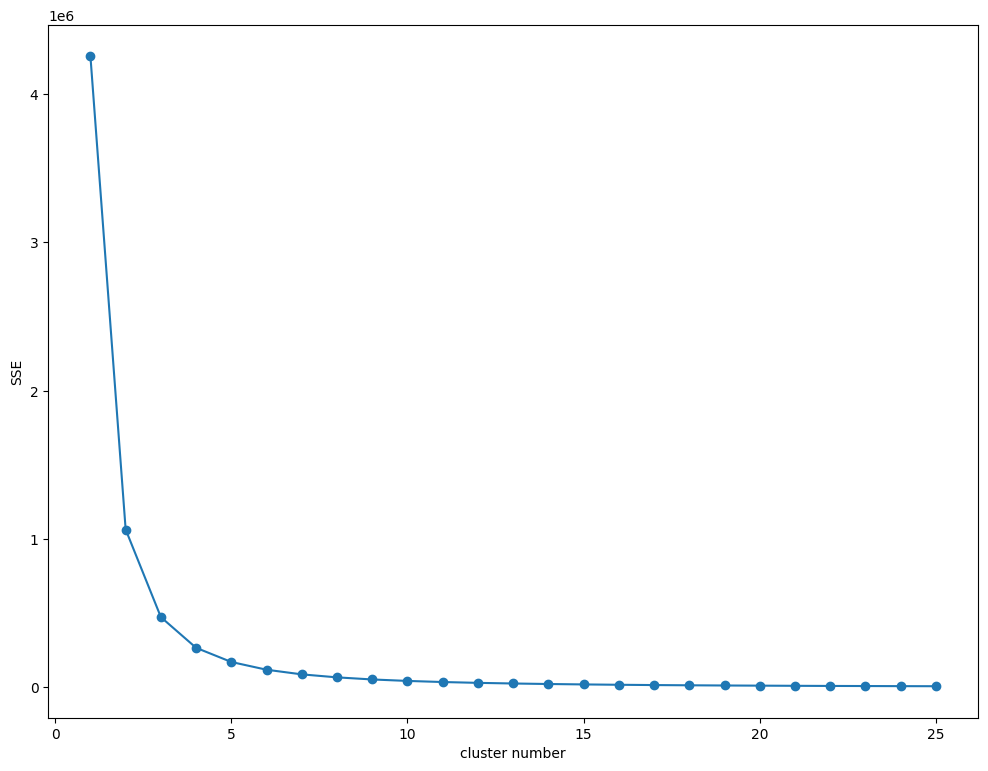

In [5]:
def elbow(X,n) :
  sse = []
  for i in range(1,n+1) :
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)

  plt.figure(figsize=(12,9))
  plt.plot(range(1,n+1), sse, marker='o')
  plt.xlabel('cluster number')
  plt.ylabel('SSE')
  plt.show()

elbow(df,25)

In [6]:
k = 5
C_x = np.random.choice(X[:,0],k)
C_y = np.random.choice(X[:,1],k)
C = np.array(list(zip(C_x, C_y)))
print(C)

[[ 37.389165 126.7556  ]
 [ 37.486048 126.869714]
 [ 37.287395 126.722521]
 [ 37.409067 126.734624]
 [ 37.466792 126.64842 ]]


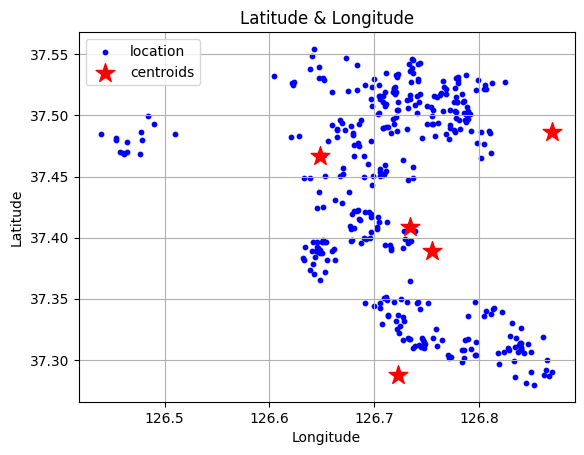

In [7]:
lat = df['Latitude']
lon = df['Longitude']
plt.title('Latitude & Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(lon,lat, c='blue', s=10, label='location')
plt.scatter(C_y, C_x, marker='*',s=200, c='red', label='centroids')
plt.legend(loc='best')
plt.grid()
plt.show()

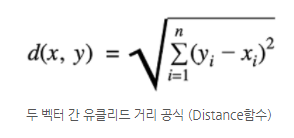

In [8]:
def distance(A,B) :
  return np.sqrt(np.sum(np.power((A-B),2)))

In [9]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = distance(C,C_old)
print(C_old)
print(flag)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
295.49905765643035


In [10]:
C_island = (37.48, 126.4)
C_x = np.random.choice(X[:,0],k-1)
C_y = np.random.choice(X[:,1],k-1)
C = list(zip(C_x, C_y))
C.append(C_island)
C = np.array(C)
print(C)

[[ 37.496311 126.704544]
 [ 37.407244 126.659795]
 [ 37.504011 126.796349]
 [ 37.501303 126.6864  ]
 [ 37.48     126.4     ]]


In [11]:
from copy import deepcopy

In [12]:
distances = []
while flag != 0:
  for i in range(len(X)):
    for j in range(k) :
      temp = distance(X[i],C[j])
      distances.append(temp)
    cluster = np.argmin(distances)
    clusters[i] = cluster
    distances = []

  C_old = deepcopy(C)

  for i in range(k) :
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    for r in range(len(points)):
      C[i][0] = np.mean(points[r][0])
      C[i][1] = np.mean(points[r][1])

  flag = distance(C, C_old)

<ipython-input-13-7b8068772690>:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[clusters==1,1], X[clusters==1,0],s=50,c='yellow',marker='x',edgecolor = 'black',label='B')


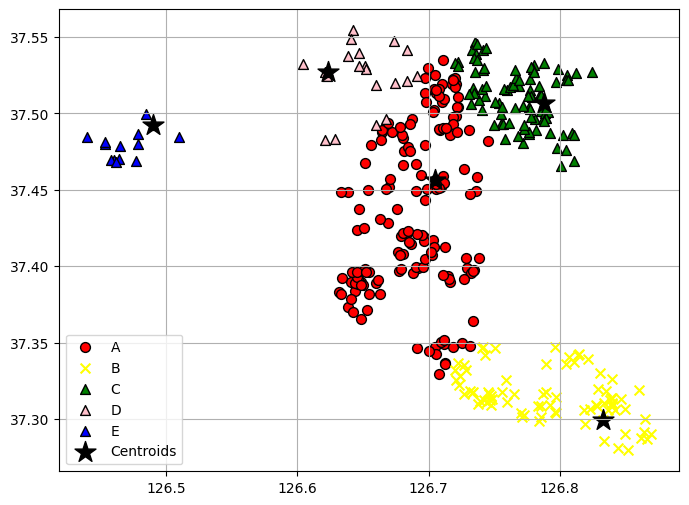

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters==0,1], X[clusters==0,0],s=50,c='red',marker='o',edgecolor = 'black',label='A')
plt.scatter(X[clusters==1,1], X[clusters==1,0],s=50,c='yellow',marker='x',edgecolor = 'black',label='B')
plt.scatter(X[clusters==2,1], X[clusters==2,0],s=50,c='green',marker='^',edgecolor = 'black',label='C')
plt.scatter(X[clusters==3,1], X[clusters==3,0],s=50,c='pink',marker='^',edgecolor = 'black',label='D')
plt.scatter(X[clusters==4,1], X[clusters==4,0],s=50,c='blue',marker='^',edgecolor = 'black',label='E')
plt.scatter(C[:,1],C[:,0],s=250,marker='*',c='black',edgecolor='black',label='Centroids')
plt.legend()
plt.grid()
plt.show()

In [14]:
!pip install folium
import folium as gm

In [15]:
import folium as gm

In [16]:
g_map = gm.Map(location=[37.428531, 126.596539], zoom_start=12)
g_map

In [17]:
m_color = ['blue', 'red', 'green', 'purple', 'orange']

In [18]:
for i in range(k):
  for j in range(len(X[clusters==i,1])):
    marker = gm.CircleMarker([X[clusters==i,0][j], X[clusters==i,1][j]], radius=3, color=m_color[i])
    marker.add_to(g_map)

g_map

In [ ]:
for i in range(len(C)):
  marker = gm.Marker([C[i][0], C[i][1]], popup='kMeans Point', icon= gm.Icon(icon='star', color='black'))
  marker.add_to(g_map)

g_map

In [19]:
for i in range(len(C)):
  marker = gm.CircleMarker([C[i][0], C[i][1]], radius=150, popup='kMeans Area', color=m_color[i], fill_color=m_color[i])
  marker.add_to(g_map)

g_map

In [20]:
g_map.save('kMeans.html')